> https://tianchi.aliyun.com/competition/new_articleDetail.html?spm=5176.8366600.0.0.4ac314daNTEbWT&raceId=231615&postsId=2580

(5106, 15106, 4)
(5106, 15106, 3)
(5106, 15106)


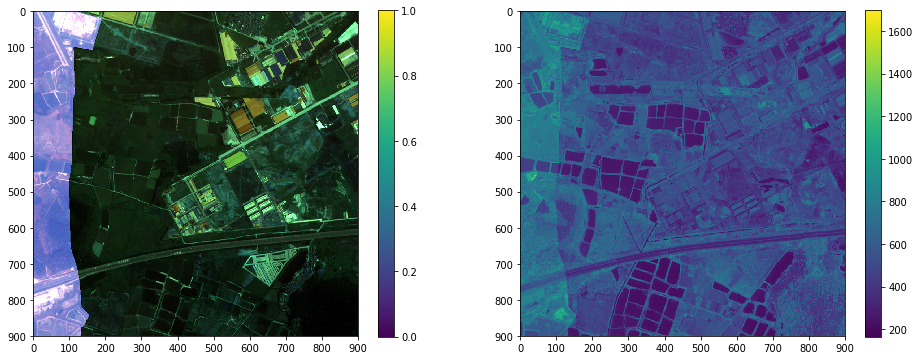

In [1]:
from collections import defaultdict
import csv
import sys

import cv2
from shapely.geometry import MultiPolygon, Polygon
import shapely.wkt
import shapely.affinity
import numpy as np
import tifffile as tiff

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

FILE_2015 = '../preliminary/quickbird2015.tif'
FILE_2017 = '../preliminary/quickbird2017.tif'
FILE_cadastral2015 = '../20170907_hint/cadastral2015.tif'
FILE_tinysample = '../20170907_hint/tinysample.tif'

im_2015 = tiff.imread(FILE_2015).transpose([1, 2, 0])

im_2017 = tiff.imread(FILE_2017).transpose([1, 2, 0])

im_tiny = tiff.imread(FILE_tinysample)

im_cada = tiff.imread(FILE_cadastral2015)

print(im_2015.shape)

print(im_tiny.shape)

print(im_cada.shape)


def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

p1 = plt.subplot(121)
i1 = p1.imshow(scale_percentile(im_2015[100:1000, 100:1000, :3]))
plt.colorbar(i1)

p2 = plt.subplot(122)
i2 = p2.imshow(im_2015[100:1000, 100:1000, 3])
plt.colorbar(i2)

plt.show()

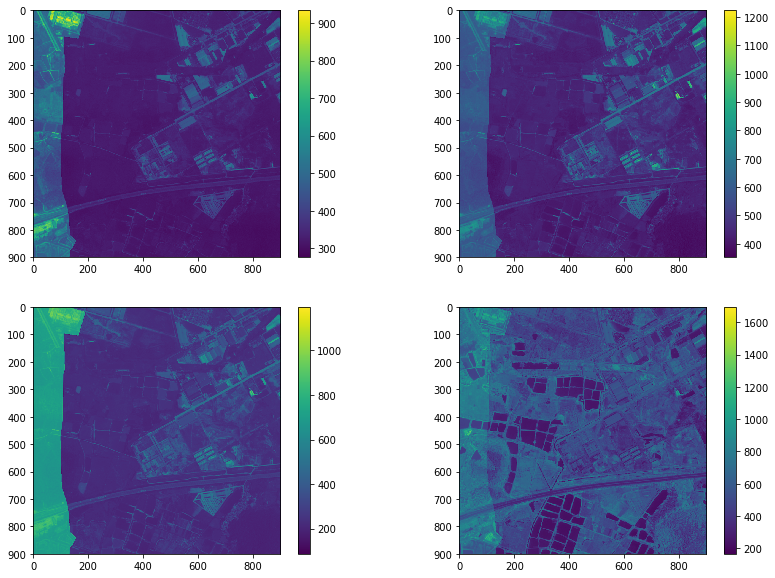

In [2]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14, 10))

p1 = plt.subplot(221)
i1 = p1.imshow(im_2015[100:1000, 100:1000, 0])
plt.colorbar(i1)

p2 = plt.subplot(222)
i2 = p2.imshow(im_2015[100:1000, 100:1000, 1])
plt.colorbar(i2)

p3 = plt.subplot(223)
i3 = p3.imshow(im_2015[100:1000, 100:1000, 2])
plt.colorbar(i3)

p4 = plt.subplot(224)
i4 = p4.imshow(im_2015[100:1000, 100:1000, 3])
plt.colorbar(i4)

plt.show()

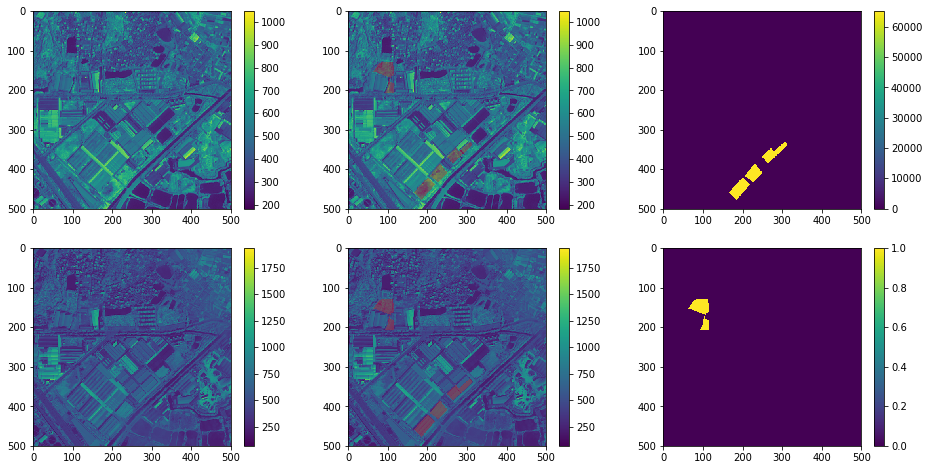

In [3]:
x_start = 500
x_end = 1000
y_start = 4800
y_end = 5300

plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

mt = np.ma.array(np.ones((x_end-x_start, y_end-y_start)), 
                 mask=((im_tiny[x_start:x_end, y_start:y_end, 0]/np.max(im_tiny)+im_cada[x_start:x_end, y_start:y_end])==0))

p151 = plt.subplot(231)
i151 = p151.imshow(im_2015[x_start:x_end, y_start:y_end, 3])
plt.colorbar(i151)

p152 = plt.subplot(233)
i152 = p152.imshow(im_tiny[x_start:x_end, y_start:y_end, 0])
plt.colorbar(i152)

p153 = plt.subplot(232)
i153 = p153.imshow(im_2015[x_start:x_end, y_start:y_end, 3])
p153.imshow(mt, cmap=cm.bwr, alpha=0.3, vmin=0, vmax=1)
plt.colorbar(i153)

p171 = plt.subplot(234)
i171 = p171.imshow(im_2017[x_start:x_end, y_start:y_end, 3])
plt.colorbar(i171)

p172 = plt.subplot(236)
i172 = p172.imshow(im_cada[x_start:x_end, y_start:y_end])
plt.colorbar(i172)

p173 = plt.subplot(235)
i173 = p173.imshow(im_2017[x_start:x_end, y_start:y_end, 3])
p173.imshow(mt, cmap=cm.bwr, alpha=0.3, vmin=0, vmax=1)
plt.colorbar(i173)

plt.show()

In [4]:
result_temp = np.random.randint(2, size=im_cada.shape, dtype=np.uint8)
tiff.imsave('../result/result_temp.tiff', result_temp)